In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# import sys
# !{sys.executable} -m pip install seaborn
# import matplotlib.pyplot as plt

In [3]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"

In [4]:
train = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, header=None, names=cols)

In [5]:
train.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
train['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

Hence, there are 800000 positive tweets and 800000 negative tweets. There are no neutral tweets in the dataset.


In [7]:
train['query_string'].value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [8]:
train.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [9]:
train.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
train[train['sentiment']==0].head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
train[train['sentiment']==4].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


Hence, the first 800000 queries are negative. While the next 800000 queries are positive.

# Preparing the data

In [12]:
train['Preclean_Length'] = train['text'].apply(lambda x: len(x))

In [13]:
train.head()

,sentiment,text,Preclean_Length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


C:\Users\Star\AppData\Local\Temp/ipykernel_7312/4132042604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Preclean_Length'])


<AxesSubplot:xlabel='Preclean_Length', ylabel='Density'>

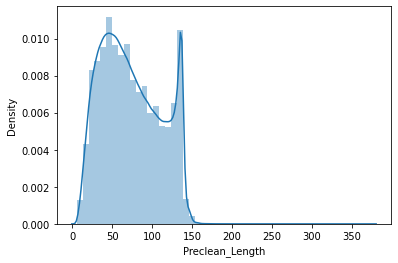

In [14]:
sns.distplot(train['Preclean_Length'])

<AxesSubplot:ylabel='Preclean_Length'>

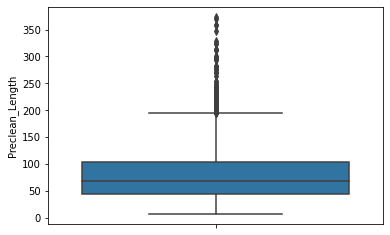

In [15]:
sns.boxplot(y='Preclean_Length', data=train)

In [16]:
train[train['Preclean_Length']>140]

,sentiment,text,Preclean_Length
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
...,...,...,...
1599460,4,@aw16 I must have skipped the &quot;pun&quot; ...,157
1599557,4,@chinkchilla there's this brilliant add-on for...,146
1599835,4,@alexandervelky that's polite version - i only...,145
1599921,4,I just switched back to Opera (using the moi s...,142


Hence, some tweets are more than 140 characters long. We need to clean the data.

# Cleaning the data

### HTML Decoding

In [17]:
train['text'][213]

"Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie "

In [18]:
import html

In [19]:
tweet = html.unescape(train['text'][213])

In [20]:
tweet

'Awwh babs... you look so sad underneith that shop entrance of "Yesterday\'s Musik"  O-: I like the look of the new transformer movie '

### URL links

In [21]:
train['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

Some tweets contain URL links. We are going to remove these URLs for the purpose of sentiment analysis.

In [22]:
import re
re.sub('https?://[A-Za-z0-9./]+','',train['text'][0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

### Mentions

Some tweets contain mentioning other users. We are going to ignore mentions as well.

In [23]:
train['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [24]:
re.sub(r'@[A-Za-z0-9]+','', train['text'][0])

" http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

### Hashtag

In [25]:
train['text'][175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [26]:
re.sub("[^a-zA-Z]", " ", train['text'][175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

## Data Cleaning function:

In [27]:
from nltk.tokenize import TreebankWordTokenizer

In [28]:
# import sys
# !{sys.executable} -m pip install nltk

In [29]:
token = TreebankWordTokenizer()

In [30]:
mentions = r'@[A-Za-z0-9]+'
url_https = 'https?://[A-Za-z0-9./]+'
url_www = r'www.[^ ]+'

In [31]:
word = "I am a  master isn't"
lists = token.tokenize(word)
print(" ".join(lists).strip())

I am a master is n't


In [32]:
negations = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
             "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
             "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
             "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
             "mustn't":"must not"
            }

In [33]:
for a,b in negations.items():
    if a in word:
        word = word.replace(a, b)

In [34]:
word

'I am a  master is not'

In [35]:
def tweet_cleaning(text):
    text = html.unescape(text)
    text = re.sub(mentions, '', text)
    text = re.sub(url_https, '', text)
    text = re.sub(url_www, '', text)
    text = text.lower()
    for a, b in negations.items():
        if a in text:
            text = text.replace(a,b)
    #Removing characters except letters
    text = re.sub("[^a-zA-Z]", " ", text)
    #Removing unnecessary white spaces using tokenizer
    word_list = token.tokenize(text)
    text = " ".join(word_list).strip()
    return text

In [36]:
testing = train.text[:50]
for t in testing:
    print(tweet_cleaning(t))

awww that s a bummer you shoulda got david carr of third day to do it d
is upset that he can not update his facebook by texting it and might cry as a result school today also blah
i dived many times for the ball managed to save the rest go out of bounds
my whole body feels itchy and like its on fire
no it s not behaving at all i m mad why am i here because i can not see you all over there
not the whole crew
need a hug
hey long time no see yes rains a bit only a bit lol i m fine thanks how s you
k nope they did not have it
que me muera
spring break in plain city it s snowing
i just re pierced my ears
i could not bear to watch it and i thought the ua loss was embarrassing
it it counts idk why i did either you never talk to me anymore
i would ve been the first but i did not have a gun not really though zac snyder s just a doucheclown
i wish i got to watch it with you i miss you and how was the premiere
hollis death scene will hurt me severely to watch on film wry is directors cut not out 

In [37]:
train['text'] = train['text'].apply(lambda x: tweet_cleaning(x))

In [38]:
train.head()

,sentiment,text,Preclean_Length
0,0,awww that s a bummer you shoulda got david car...,115
1,0,is upset that he can not update his facebook b...,111
2,0,i dived many times for the ball managed to sav...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,no it s not behaving at all i m mad why am i h...,111


In [39]:
# train.drop(['Preclean_Length'], axis=1, inplace=True)

In [40]:
train.head()

,sentiment,text,Preclean_Length
0,0,awww that s a bummer you shoulda got david car...,115
1,0,is upset that he can not update his facebook b...,111
2,0,i dived many times for the ball managed to sav...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,no it s not behaving at all i m mad why am i h...,111


In [41]:
train.to_csv('clean_tweets.csv', encoding='ISO-8859-1')

In [42]:
train.head()

,sentiment,text,Preclean_Length
0,0,awww that s a bummer you shoulda got david car...,115
1,0,is upset that he can not update his facebook b...,111
2,0,i dived many times for the ball managed to sav...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,no it s not behaving at all i m mad why am i h...,111
